# objectif est d'analyser un fichier excel qui contient des donnees d'une entreprise commercial  enfin de tires des informations clair 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importation des ressousces 

In [80]:
df = pd.read_excel("ressource.xlsx")
df.head()

,Sub_Region_Cod,Colonne2,Colonne3,Country_Cod,Colonne1,Categ,Colonne8,Colonne7,Colonne6,Colonne5,Colonne4,Period,Product_Ref,Sales
0,EUE,1,Europe de l'Est,RUS,freq,Haut-Et-Bas,1,1.666667,1,2020,2020 T1,2021-02-01,P42590,2095.59
1,EUE,1,Europe de l'Est,BLR,Bélarus,Haut,2,2.666667,2,2019,2019 T2,2020-04-01,P16713,8600.60
2,EUE,1,Europe de l'Est,ROU,Roumanie,Haut,4,4.666667,4,2019,2019 T4,2019-10-01,P28875,8326.90
3,EUE,1,Europe de l'Est,MDA,République de Moldavie,Bas,10,10.666667,10,2020,2020 T10,2019-12-01,P48563,3295.69
4,EUE,1,Europe de l'Est,BLR,Bélarus,Bas,12,12.666667,12,2020,2020 T12,2020-06-01,P34541,6351.77


# verification des errers et netoyage  si necessaire

In [81]:
df.dtypes

Sub_Region_Cod            object
Colonne2                   int64
Colonne3                  object
  Country_Cod             object
Colonne1                  object
Categ                     object
Colonne8                   int64
Colonne7                 float64
Colonne6                   int64
Colonne5                   int64
Colonne4                  object
Period            datetime64[ns]
Product_Ref               object
Sales                    float64
dtype: object

# verification des colonnes

In [82]:
colones = df.columns
colones

Index(['Sub_Region_Cod', 'Colonne2', 'Colonne3', '  Country_Cod', 'Colonne1',
       'Categ', 'Colonne8', 'Colonne7', 'Colonne6', 'Colonne5', 'Colonne4',
       'Period', 'Product_Ref', 'Sales'],
      dtype='object')

# j'efface les colonnes inutile

In [83]:
df1 = df.drop(columns=['Colonne2','Colonne3','Colonne4','Colonne5','Colonne6','Colonne7','Colonne8'])
df1

,Sub_Region_Cod,Country_Cod,Colonne1,Categ,Period,Product_Ref,Sales
0,EUE,RUS,freq,Haut-Et-Bas,2021-02-01,P42590,2095.59
1,EUE,BLR,Bélarus,Haut,2020-04-01,P16713,8600.60
2,EUE,ROU,Roumanie,Haut,2019-10-01,P28875,8326.90
3,EUE,MDA,République de Moldavie,Bas,2019-12-01,P48563,3295.69
4,EUE,BLR,Bélarus,Bas,2020-06-01,P34541,6351.77
...,...,...,...,...,...,...,...
1110,EUE,BLR,Bélarus,Haut-Et-Bas,2021-02-01,P47218,9043.65
1111,EUE,ARM,Arménie,Haut,2021-01-01,P22419,6450.55
1112,EUE,BLR,Bélarus,Haut,2021-01-01,P26371,7187.45
1113,EUE,HUN,Hongrie,Bas,2020-11-01,P22923,9970.65


# je renome la colonnnes1 : pays

In [84]:
df1.rename(columns ={'Colonne1':'pays'},inplace=True)
df1

,Sub_Region_Cod,Country_Cod,pays,Categ,Period,Product_Ref,Sales
0,EUE,RUS,freq,Haut-Et-Bas,2021-02-01,P42590,2095.59
1,EUE,BLR,Bélarus,Haut,2020-04-01,P16713,8600.60
2,EUE,ROU,Roumanie,Haut,2019-10-01,P28875,8326.90
3,EUE,MDA,République de Moldavie,Bas,2019-12-01,P48563,3295.69
4,EUE,BLR,Bélarus,Bas,2020-06-01,P34541,6351.77
...,...,...,...,...,...,...,...
1110,EUE,BLR,Bélarus,Haut-Et-Bas,2021-02-01,P47218,9043.65
1111,EUE,ARM,Arménie,Haut,2021-01-01,P22419,6450.55
1112,EUE,BLR,Bélarus,Haut,2021-01-01,P26371,7187.45
1113,EUE,HUN,Hongrie,Bas,2020-11-01,P22923,9970.65


# les erreurs lexical

In [85]:
list_pays = ['pays','Arménie','Bulgarie','Bélarus','Fédération de Russie', 'Hongrie', 'Pologne','Roumanie','République Tchèque','République de Moldavie','Slovaquie','Ukraine']
mask = ~df1['pays'].isin(list_pays)
df1.loc[mask,'pays']= 'Ukraine'


#  et les irreguralites

In [86]:
df1.describe()

,Period,Sales
count,1115,1115.000000
mean,2020-04-14 04:45:25.022421504,5107.662090
min,2019-05-01 00:00:00,16.340000
25%,2019-10-01 00:00:00,2677.685000
50%,2020-04-01 00:00:00,5094.790000
75%,2020-10-01 00:00:00,7629.160000
max,2021-04-01 00:00:00,9990.990000
std,NaN,2907.533533


# les valeurs maquantes 

In [87]:
df1.isnull().sum()

Sub_Region_Cod    0
  Country_Cod     0
pays              0
Categ             0
Period            0
Product_Ref       0
Sales             0
dtype: int64

In [88]:
sort =df1.sort_values('Sales', ascending= True)
print(f'\n les 5CA les plus bas sont:\n')
sort.head(5)


 les 5CA les plus bas sont:



,Sub_Region_Cod,Country_Cod,pays,Categ,Period,Product_Ref,Sales
294,EUE,CZE,République Tchèque,Haut,2020-05-01,P04202,16.34
339,EUE,SVK,Slovaquie,Haut-Et-Bas,2020-09-01,P27142,23.99
466,EUE,BLR,Bélarus,Bas,2019-08-01,P32594,31.54
5,EUE,RUS,Fédération de Russie,Haut,2020-09-01,P42148,46.42
227,EUE,UKR,Ukraine,Haut,2019-05-01,P08803,47.41


In [89]:
sort1 =df1.sort_values('Sales', ascending= False)
print(f'\n les 5CA les plus haut sont:\n')
sort1.head(5)


 les 5CA les plus haut sont:



,Sub_Region_Cod,Country_Cod,pays,Categ,Period,Product_Ref,Sales
728,EUE,POL,Pologne,Bas,2020-05-01,P46891,9990.99
1031,EUE,ROU,Roumanie,Haut,2019-12-01,P34348,9974.25
904,EUE,BLR,Bélarus,Bas,2019-12-01,P32994,9973.96
1113,EUE,HUN,Hongrie,Bas,2020-11-01,P22923,9970.65
157,EUE,ARM,Arménie,Haut,2020-02-01,P32123,9953.61


# agregation des donnees pour mieux visualiser

In [90]:
agdf1=df1.groupby('pays')['Sales'].sum()
agdf1

pays
Arménie                   566823.51
Bulgarie                  523698.74
Bélarus                   534110.29
Fédération de Russie      578770.91
Hongrie                   497901.17
Pologne                   481774.77
Roumanie                  439821.85
République Tchèque        614292.30
République de Moldavie    467384.30
Slovaquie                 552386.27
Ukraine                   438079.12
Name: Sales, dtype: float64

# la vusialisation des de CA par pays 

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_8096\4126739716.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1 ,x='pays', y='Sales',hue='pays',ci=None)


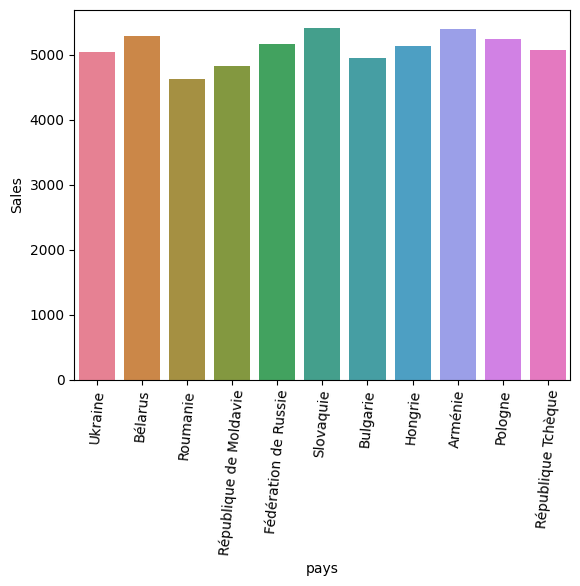

In [91]:
sns.barplot(data=df1 ,x='pays', y='Sales',hue='pays',ci=None)
plt.xticks(rotation=85)
plt.show()

# diagrame en cercle 

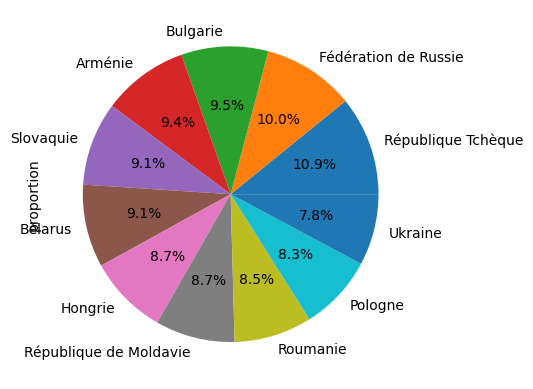

In [92]:
sort1['pays'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.show()